In [1]:
from CosinorPy import file_parser, cosinor, cosinor1
import numpy as np
import pandas as pd

## Generate test data

In [2]:
df = file_parser.generate_test_data(phase = 0, n_components = 1, name="test1", independent=False, replicates = 3, noise=0.5)
df2 = file_parser.generate_test_data(phase = np.pi, n_components = 1, name="test2", independent = False, replicates = 3, noise=0.5)
df = df.append(df2, ignore_index=True)

df2 = file_parser.generate_test_data(phase = 0, n_components = 3, name="test3", replicates = 3, independent = False, noise=0.5, time_step=1)
df = df.append(df2, ignore_index=True)
df2 = file_parser.generate_test_data(phase = np.pi, n_components = 3, name="test4",  replicates = 3, independent = False, noise=0.5, time_step=1)
df = df.append(df2, ignore_index=True)

These data can be exported to either excel or csv format

In [3]:
file_parser.export(df,"dependent_data.xlsx", independent=False)

In [4]:
file_parser.export_csv(df,"dependent_data.csv")

In [5]:
#df = file_parser.read_excel("data.xlsx", independent=False)

## Plot Periodograms

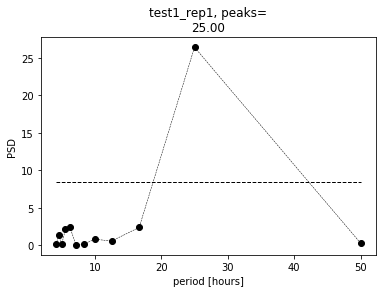

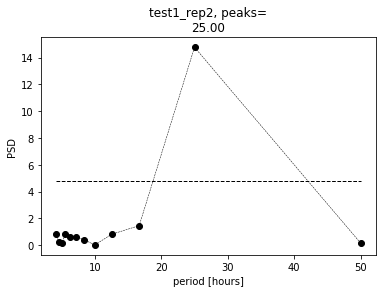

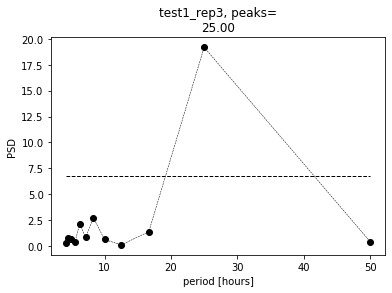

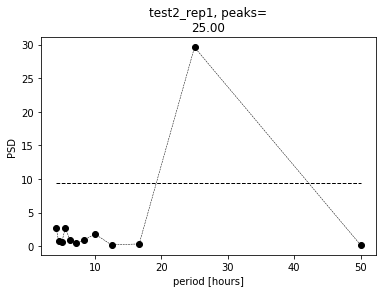

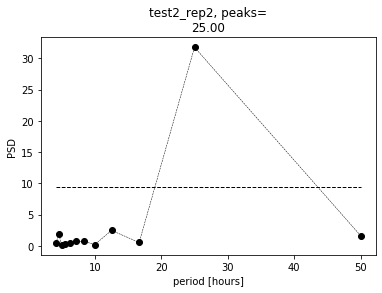

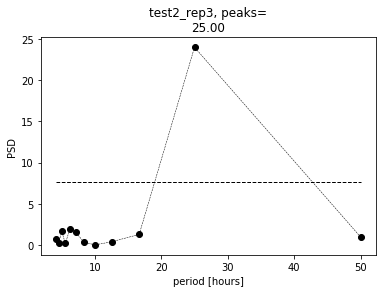

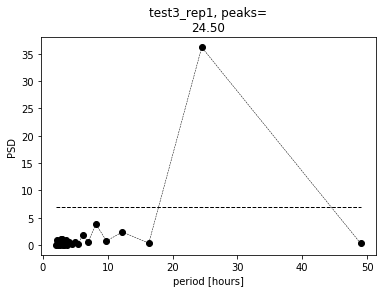

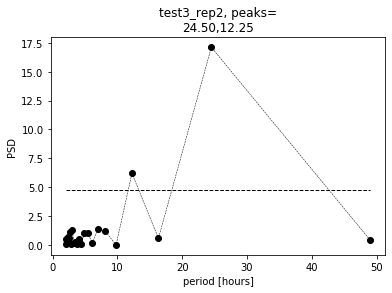

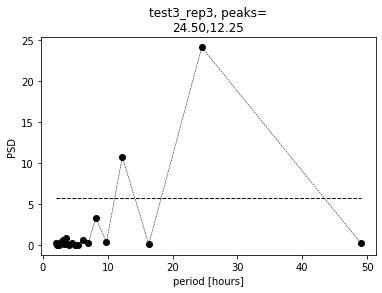

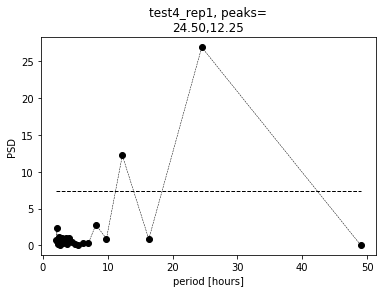

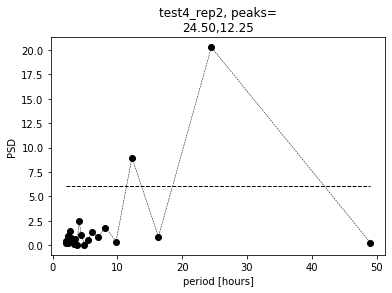

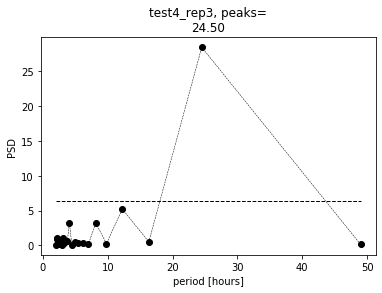

In [7]:
cosinor.periodogram_df(df)

## Cosinor analysis

Identify the best models and/or the best periods (possible periods can be given as an interval or as a single value).

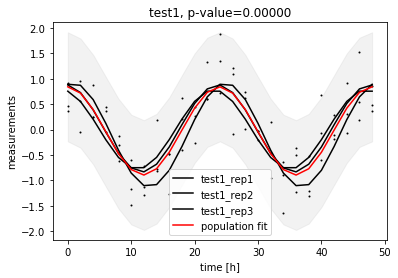

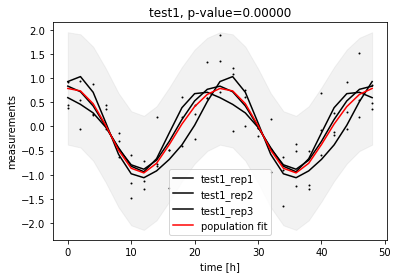

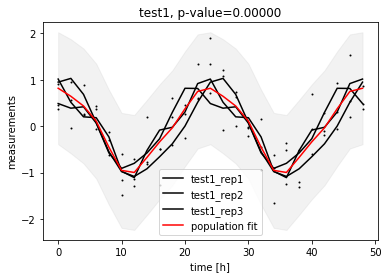

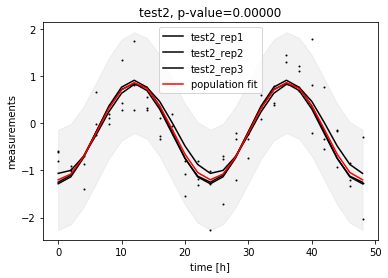

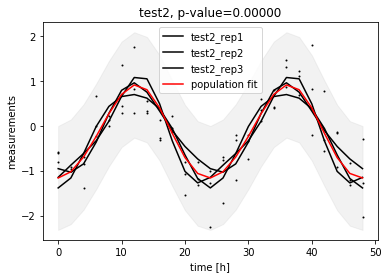

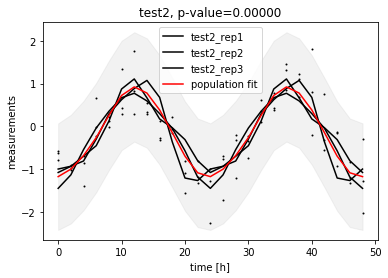

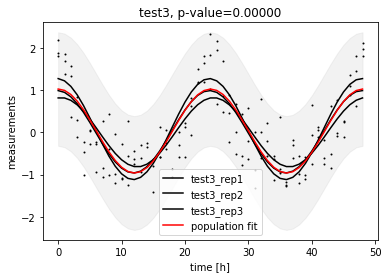

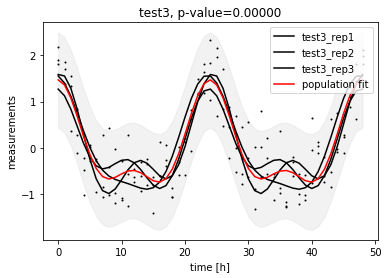

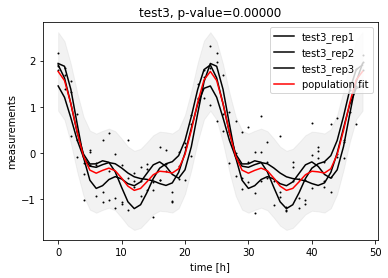

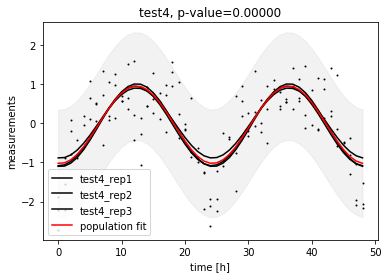

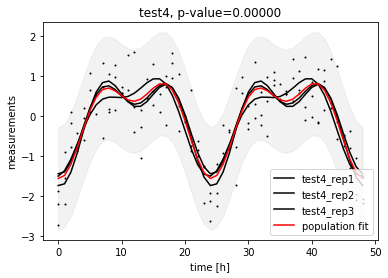

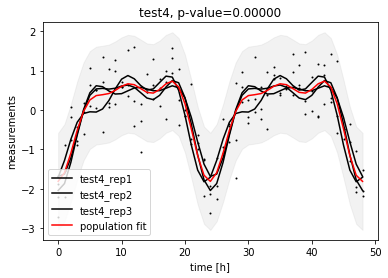

In [8]:
df_results = cosinor.population_fit_group(df, n_components = [1,2,3], period=24) #folder=""

Get the best models (the best fitting periods and the best fitting models - in dependence on the number of components; by default the criterium is RSS value)

In [11]:
df_best_models = cosinor.get_best_models_population(df, df_results, n_components = [1,2,3])

... and plot these models.

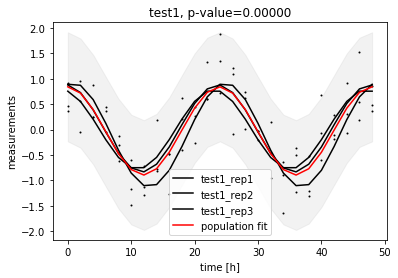

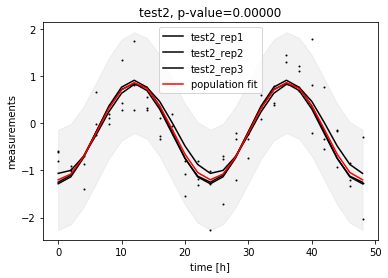

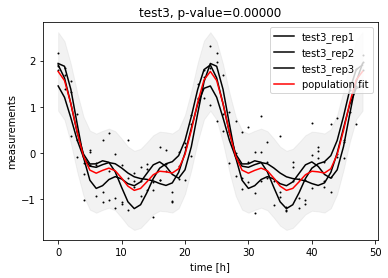

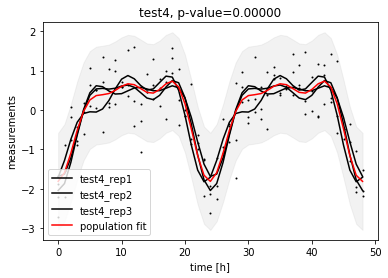

In [12]:
#cosinor.plot_df_models_population(df, df_best_models, folder="paper")
cosinor.plot_df_models_population(df, df_best_models)

Display the results or store the results as a csv file:

In [13]:
df_best_models.to_csv("demo_dependent_cosinor_best.csv", index=False)

## Cosinor1 analysis

Only 1-component model can be used, but the statistics is much richer...

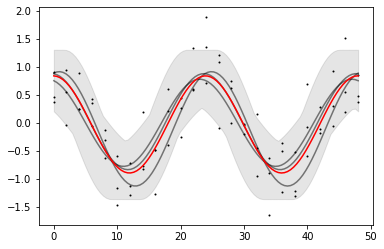

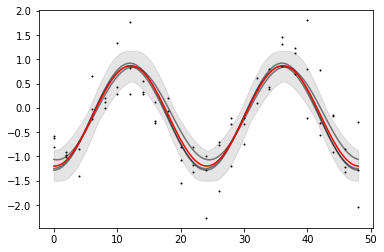

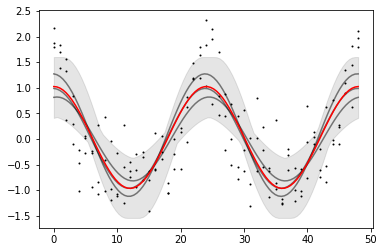

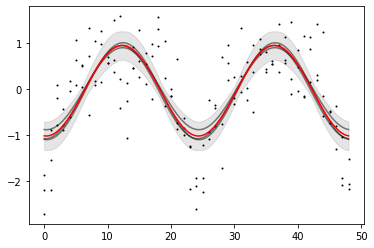

In [14]:
df_results = cosinor1.population_fit_group(df)

In [144]:
df_results

,test,p,q,amplitude,LB(amplitude),UB(amplitude),acrophase,LB(acrophase),UB(acrophase),acrophase[h]
0,test1,0.047091,0.062788,0.998064,0.853573,1.142555,-0.082918,-0.220290,0.059947,0.316724
1,test2,0.012587,0.046185,1.056586,0.830540,1.282632,-3.249857,-3.737245,-2.917111,12.413538
2,test3,0.094562,0.094562,1.071749,0.705729,1.437769,-6.243145,-6.605224,-5.735266,23.847059
3,test4,0.023092,0.046185,1.025013,0.945930,1.104095,-3.201579,-3.301778,-3.107540,12.229129


## Comparison analysis using cosinor1

Define the pairs to compare

In [166]:
pairs = (["test1", "test2"],["test3", "test4"])

In [167]:
df_comp = cosinor1.population_test_cosinor_pairs(df, pairs)

Results of population amplitude difference test are not reliable due to different acrophases.
Results of population amplitude difference test are not reliable due to different acrophases.


In [168]:
df_comp[["test", "q(d_amplitude)", "q(d_acrophase)"]]

,test,q(d_amplitude),q(d_acrophase)
0,test1 vs test2,0.537841,0.000036
1,test3 vs test4,0.544973,0.000120
